# Index

sorry, only last two setup...

1. Lab | Cleaning numerical and categorical data (both lab 1 & 2)¶
2. Lab | Feature Extraction (below 1 & 2)
3. [Lab | Feature Extraction](#Lab-|-Feature-Extraction)
4. [Lab | Data cleaning and wrangling](#Lab-|-Data-cleaning-and-wrangling)

# Lab | Cleaning numerical and categorical data (both lab 1 & 2)

## aka...defining some handy functions

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

**Instructions**
1. Import the necessary libraries.
2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
3. First look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case).
5. Change effective to date column to datetime format.
6. Check NaN values per column.
7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
9. Get categorical features.
10. What should we do with the customer_id column?

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime

from sklearn import linear_model
from sklearn.metrics import mean_squared_error as unkind_squared_error, r2_score
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

## 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
#load the file:
customer_df = pd.read_csv('../lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

## 3. Explore

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## 4 & 5 - Tidy up headings & set datetime format

In [7]:
def prep_headings(my_df, columns_that_should_be_dates):
    # remove Unnamed: 0
    # my_df = my_df.drop(columns=['Unnamed: 0'])

    # drop to lower case
    my_df.columns = list(map(lambda x:x.lower(),my_df.columns))

    # replace spaces with _
    my_df.columns = list(map(lambda x:x.replace(' ','_'),my_df.columns))

    # set 'effective_to_date' to date type
    my_df[columns_that_should_be_dates] = pd.to_datetime(my_df[columns_that_should_be_dates])
    
    return my_df

In [8]:
customer_df = prep_headings(customer_df, 'effective_to_date')
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 6. Check NaN values per column.

In [9]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## 7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [10]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [11]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [12]:
def define_variable(df, unique_value_max=10):
    
    categorical = []
    num_continuous = []
    num_descrete = []
    dateandtimes = []
    for c in df.columns:
        if df[c].dtype == object:
            #print(c + " categorical")
            categorical.append(c)
        #elif type(df[c].dtype) is datetime.datetime:
        #elif df[c].dtype == np.datetime64:
        #elif is_datetime64_any_dtype(fd[c]):
        elif df[c].dtype == pd.to_datetime(df[c]): # 4th times a charm
            dateandtimes.append(c)
        else:
            if df[c].nunique() > unique_value_max:
                #print(c + " numerical - continuous")
                num_continuous.append(c)
            else:
                #print(c + " numerical - descrete")
                num_descrete.append(c)
        
        # maybe print the return order for added clarity on how to use function
        # is this going to throw a fit if we dont append anything to one of the vars...checked by passing back one of the split out dfs
                
    return df[categorical].copy(), df[num_continuous].copy(), df[num_descrete].copy(), df[dateandtimes].copy()
       
cat_features, num_continuous_features, num_descrete_features, df_dates = define_variable(customer_df)
#cat_features2, num_continuous_features2, num_descrete_features2 = define_variable(cat_features) # check if this breaks function...

display(cat_features.head())
display(num_continuous_features)
display(num_descrete_features)
display(df_dates)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


,effective_to_date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03
...,...
9129,2011-02-10
9130,2011-02-12
9131,2011-02-06
9132,2011-02-03


## Lab 2 (question 3 - Plot a correlation matrix, what can you see?)

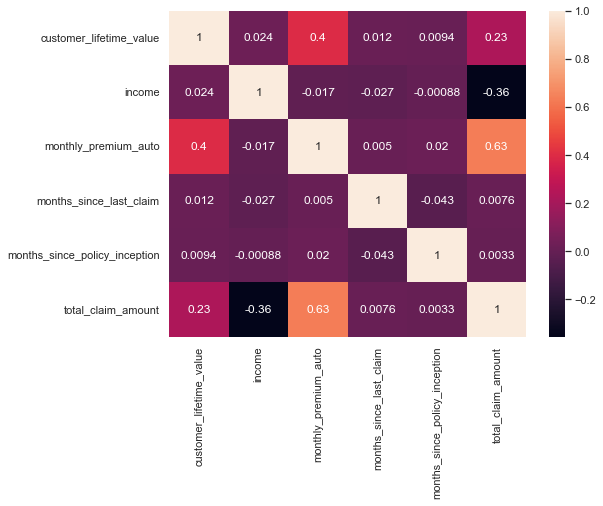

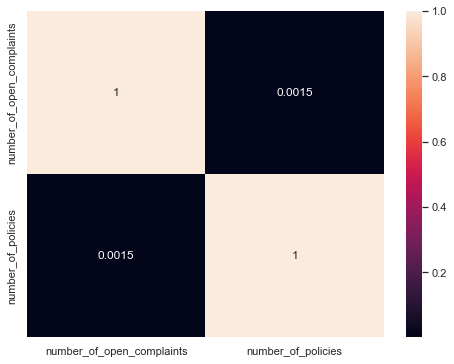

In [13]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(num_continuous_features.corr(), annot=True)
plt.show()

sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(num_descrete_features.corr(), annot=True)
plt.show()

*None of our values have a high correlation with each other*

## Lab 2 (question 4) Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

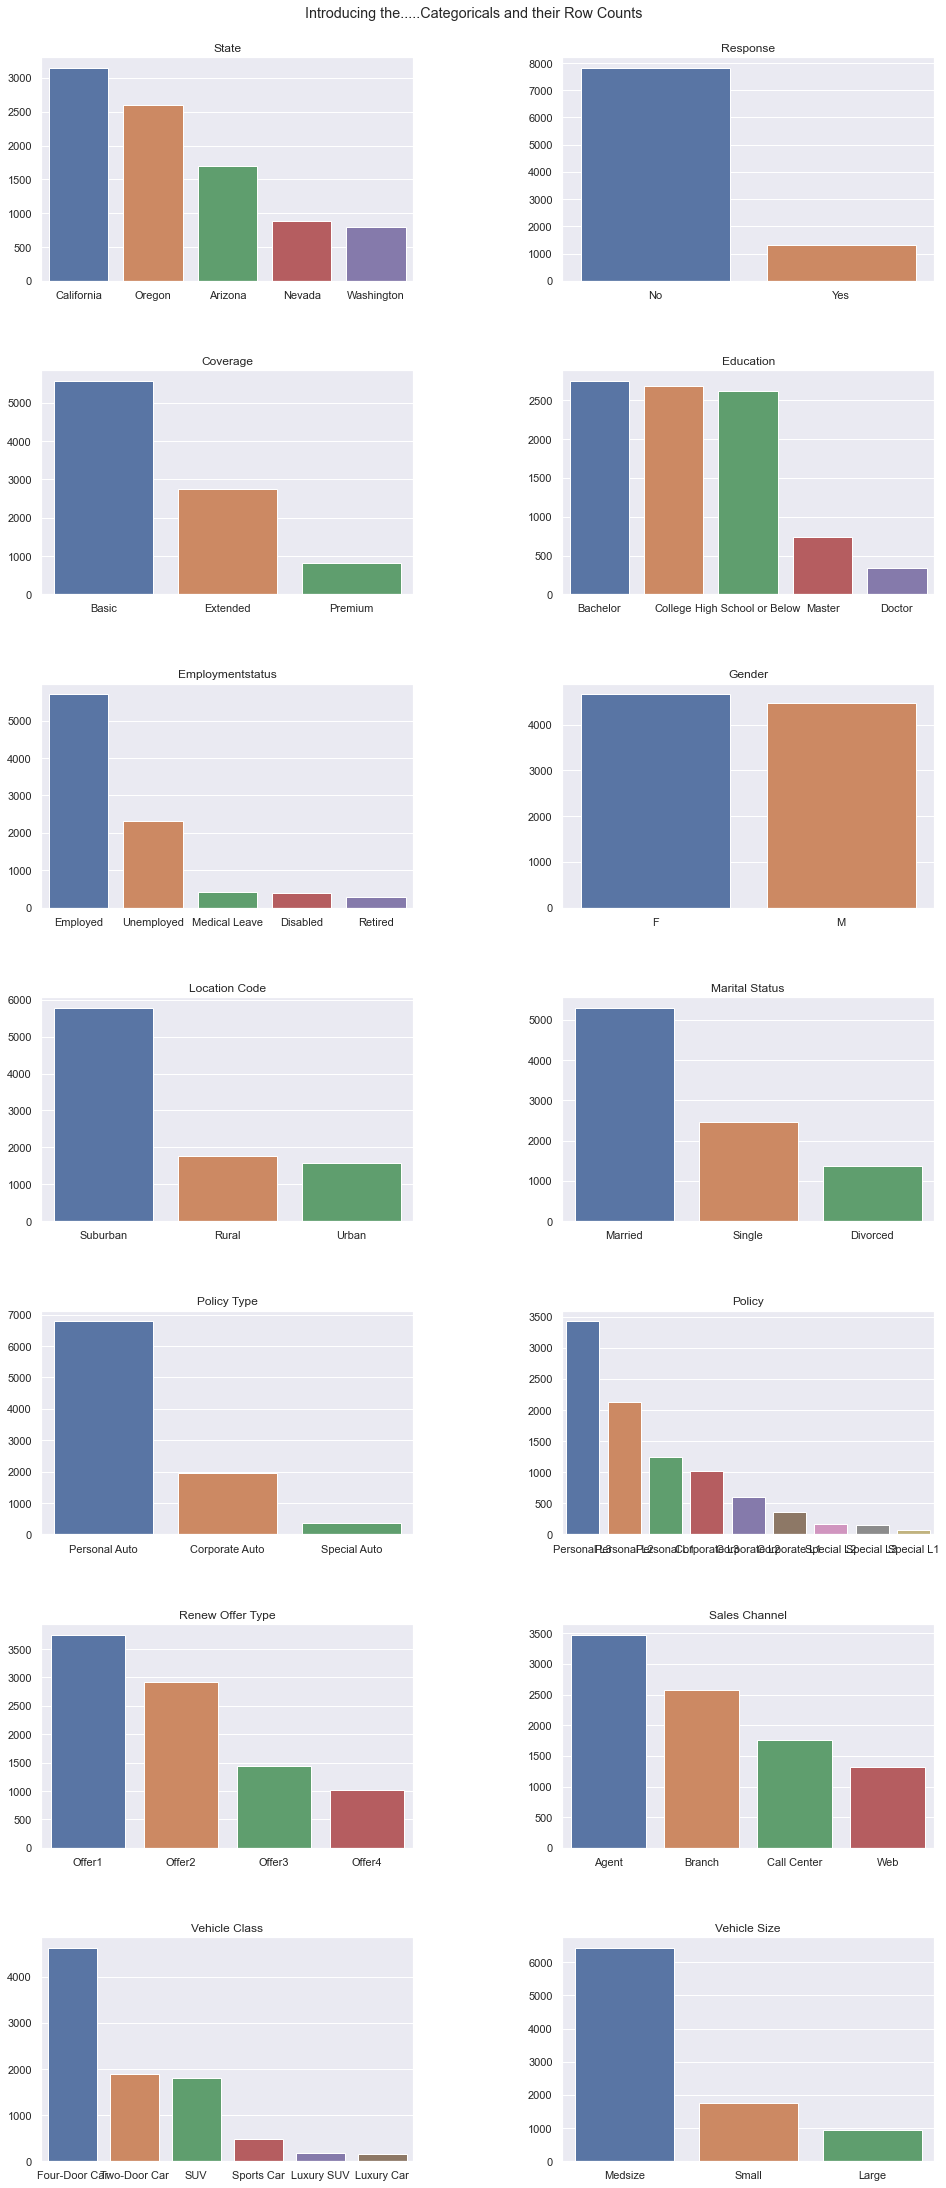

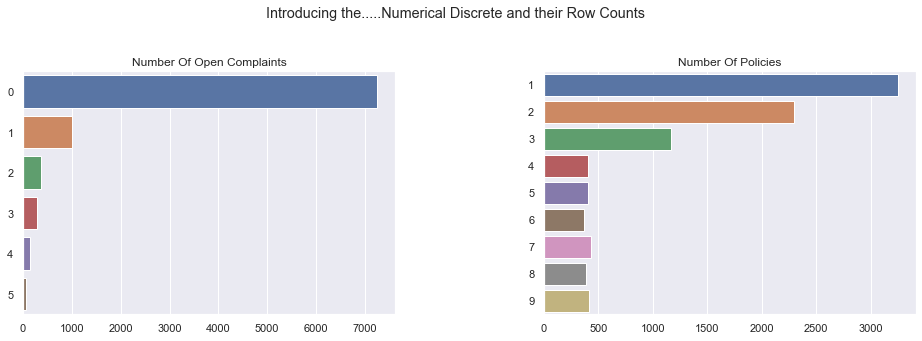

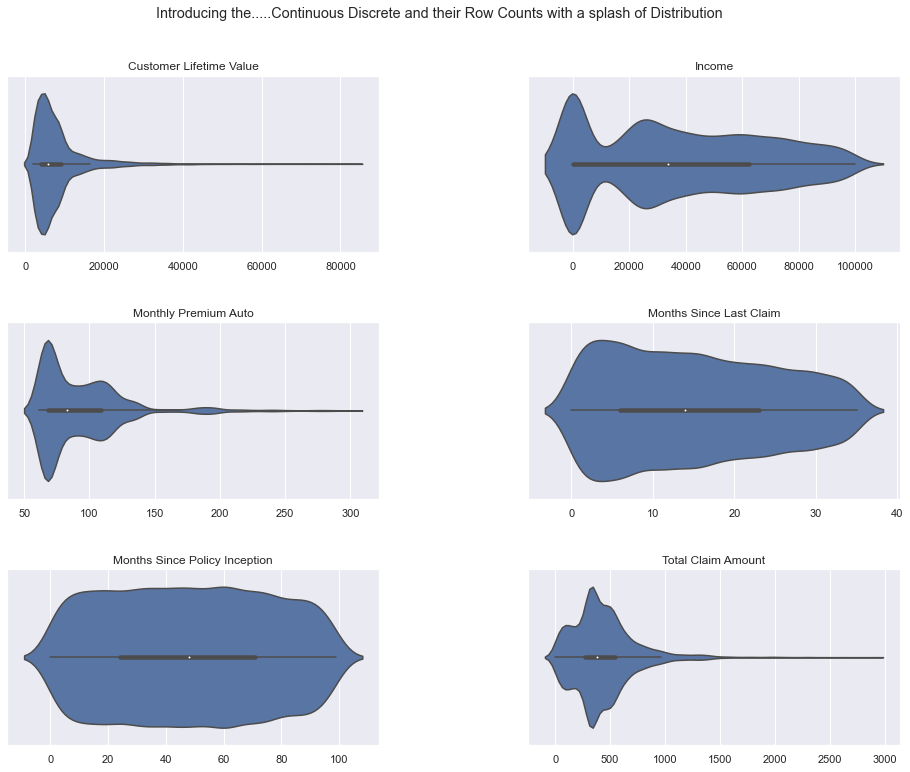

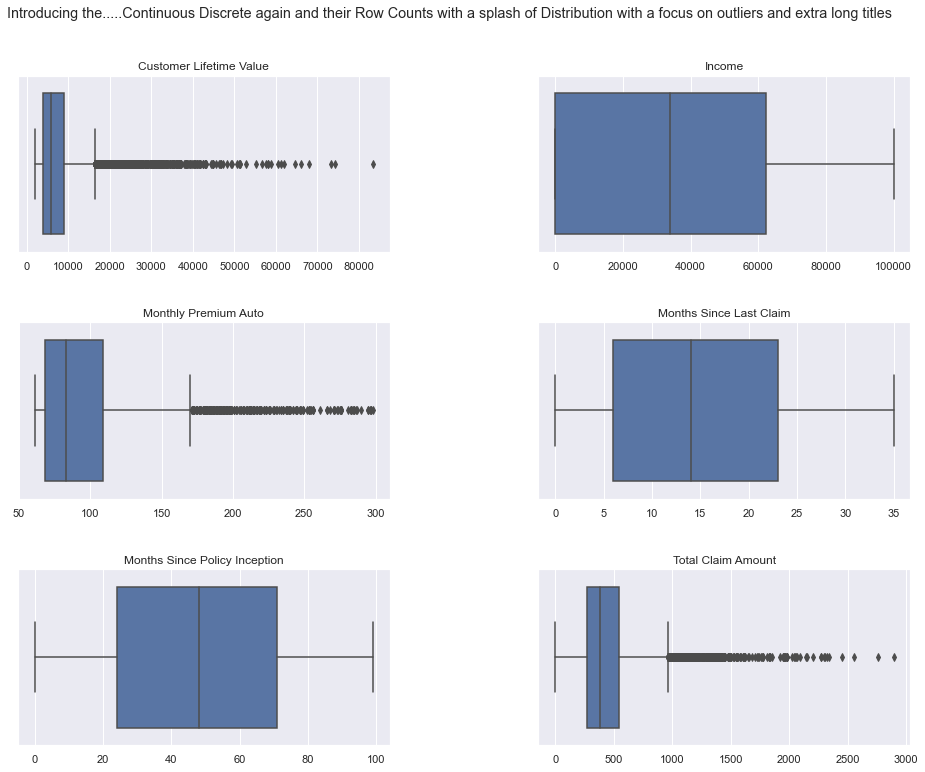

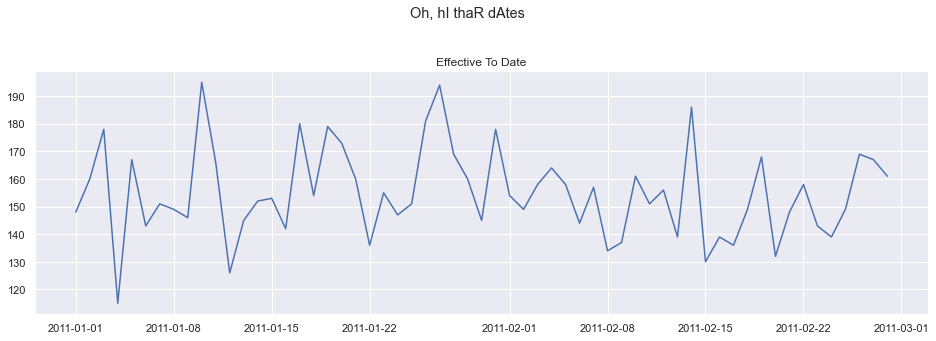

In [14]:
def unsnake(text):
    return text.replace("_"," ").title()


# had print statements for each section initially, thoguht I'd get fancy and look into adding sub plot titles.
# ...found it but position was way to high, then found out about tight_layout
# ...and position was overlapping chart as tight_layout ignores suptitles
# ...then I found fig.subplots_adjust(top=0.95) to bring it back down..
# ...and then I discovered it was different for each of my subplots to get it into a decent position
# ...then read what subplots_adjust is doing to see why, oh, it's % based of the chart area
# ...considering mathing it but brain power diminished a long long time ago
# ...leaving it for now as works well enough here but it is not dynamic so a different dataset the titles will be borked
# tl;dr - should have just left it with stuck with the print statements :'(

# @future andy: if/when you reuse this - sort the math out or revert to print statements.
#               also, sort out the alignment skewed by axis ticks
#               also, it'd be nice if when calling the function you chose how many columns to use
#               also, 


def plot_my_df(df):
    
    cat_features, num_continuous_features, num_descrete_features, df_dates = define_variable(df)
    
    if len(cat_features.columns) > 0:
        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(cat_features.columns[1:].nunique()/2)*5))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.tight_layout()
        fig.subplots_adjust(top=0.96)

        i = 1
        for c in cat_features.columns[1:]: #skip customer
            ax = fig.add_subplot(math.ceil(cat_features.columns[1:].nunique()/2), 2, i)
            ax.set(title='Does this make me a title for the group')
            i = i + 1
            ax = sns.countplot(x=c, data=df, ax=ax, order=df[c].value_counts().index)        
            ax.set(xlabel=None, ylabel=None, title=unsnake(c))
        plt.suptitle('Introducing the.....Categoricals and their Row Counts') 
        plt.show()
    
    if len(num_descrete_features.columns) > 0:
        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(num_descrete_features.columns.nunique()/2)*5))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.subplots_adjust(top=0.8) # 
        i = 1
        for c in num_descrete_features.columns: #skip customer
            ax = fig.add_subplot(math.ceil(num_descrete_features.columns.nunique()/2), 2, i)
            i = i + 1
            ax = sns.countplot(y=c, data=df, ax=ax)        
            ax.set(xlabel=None, ylabel=None, title=unsnake(c))
        plt.suptitle('Introducing the.....Numerical Discrete and their Row Counts')
        plt.show()
    
    if len(num_continuous_features.columns) > 0:
        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(num_continuous_features.columns.nunique()/2)*4))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.subplots_adjust(top=0.90)
        i = 1
        for c in num_continuous_features.columns: #skip customer
            ax = fig.add_subplot(math.ceil(num_continuous_features.columns.nunique()/2), 2, i)
            #ax = sns.swarmplot(x=c, data=df, color=".25")
            i = i + 1
            ax = sns.violinplot(x=c, data=df, ax=ax) 
            ax.set(xlabel=None, ylabel=None, title=unsnake(c))
        plt.suptitle('Introducing the.....Continuous Discrete and their Row Counts with a splash of Distribution')
        plt.show()

        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(num_continuous_features.columns.nunique()/2)*4))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.subplots_adjust(top=0.90)
        i = 1
        for c in num_continuous_features.columns: #skip customer
            ax = fig.add_subplot(math.ceil(num_continuous_features.columns.nunique()/2), 2, i)
            #ax = sns.swarmplot(x=c, data=df, color=".25")
            i = i + 1
            ax = sns.boxplot(x=c, data=df, ax=ax) 
            ax.set(xlabel=None, ylabel=None, title=unsnake(c))
        plt.suptitle('Introducing the.....Continuous Discrete again and their Row Counts with a splash of Distribution with a focus on outliers and extra long titles')
        plt.show()
    
    if len(df_dates.columns) > 0:
        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(df_dates.columns.nunique()/2)*5))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.subplots_adjust(top=0.80)
        i = 1
        for c in df_dates.columns: #skip customer
            ax =  fig.add_subplot(math.ceil(df_dates.columns.nunique()/2), 1, i)
            i = i + 1
            ax = sns.lineplot(x=df[c].value_counts().keys().tolist(),y=df[c].value_counts().tolist(), ax=ax)
            ax.set(ylabel=None, title=unsnake(c))
        plt.suptitle('Oh, hI thaR dAtes')
        plt.show()    

plot_my_df(customer_df)


## 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [15]:
for c in cat_features.columns[1:]:
    print(c + " - " + str (cat_features[c].nunique()))
    display(cat_features[c].value_counts(dropna=False))
    print()

state - 5


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64


response - 2


No     7826
Yes    1308
Name: response, dtype: int64


coverage - 3


Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64


education - 5


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64


employmentstatus - 5


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64


gender - 2


F    4658
M    4476
Name: gender, dtype: int64


location_code - 3


Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64


marital_status - 3


Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64


policy_type - 3


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64


policy - 9


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64


renew_offer_type - 4


Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64


sales_channel - 4


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64


vehicle_class - 6


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64


vehicle_size - 3


Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

## 8...again, dropping in Lab 2 here.

In [16]:
def text_to_other(x, keepers, other='Other'):
    if x in keepers:
        return x
    else:
        return other

Below we can run it to blindly set 'other' values when we have a lot of categories in our categoricals. We'll do it ~properly~ a lil more proper though below...

In [17]:
# def lazy_boy(df, to_keep=4):
#     for c in df.columns:
#         df[c] = df[c].apply(text_to_other, keepers=list(df[c].value_counts().head(to_keep).index))
#     return df
       
# lulz_approach = lazy_boy(cat_features, to_keep=4)

# for c in lulz_approach.columns[1:]:
#     print(c + " - " + str (lulz_approach[c].nunique()))
#     display(lulz_approach[c].value_counts(dropna=False))
#     print()

state - lets keep 3 and other

education - lets keep 3 & raname other to Master/Doctor

employmentstatus - keep 2 and other

policy - repeats info in policy type, drop policy type and just keep L1,L2,L3

vehicle_class - keep 3 & rename other to Sports/Luxury

In [18]:
cat_features['state'] = cat_features['state'].apply(text_to_other, keepers=list(cat_features['state'].value_counts().head(3).index))
cat_features['education'] = cat_features['education'].apply(text_to_other, keepers=list(cat_features['education'].value_counts().head(3).index),other='Masters/Doctor')
cat_features['employmentstatus'] = cat_features['employmentstatus'].apply(text_to_other, keepers=list(cat_features['employmentstatus'].value_counts().head(2).index))
cat_features['vehicle_class'] = cat_features['vehicle_class'].apply(text_to_other, keepers=list(cat_features['vehicle_class'].value_counts().head(3).index),other='Sports/Luxury')
cat_features['policy'] = list(map(lambda x:x[-2:],cat_features['policy']))

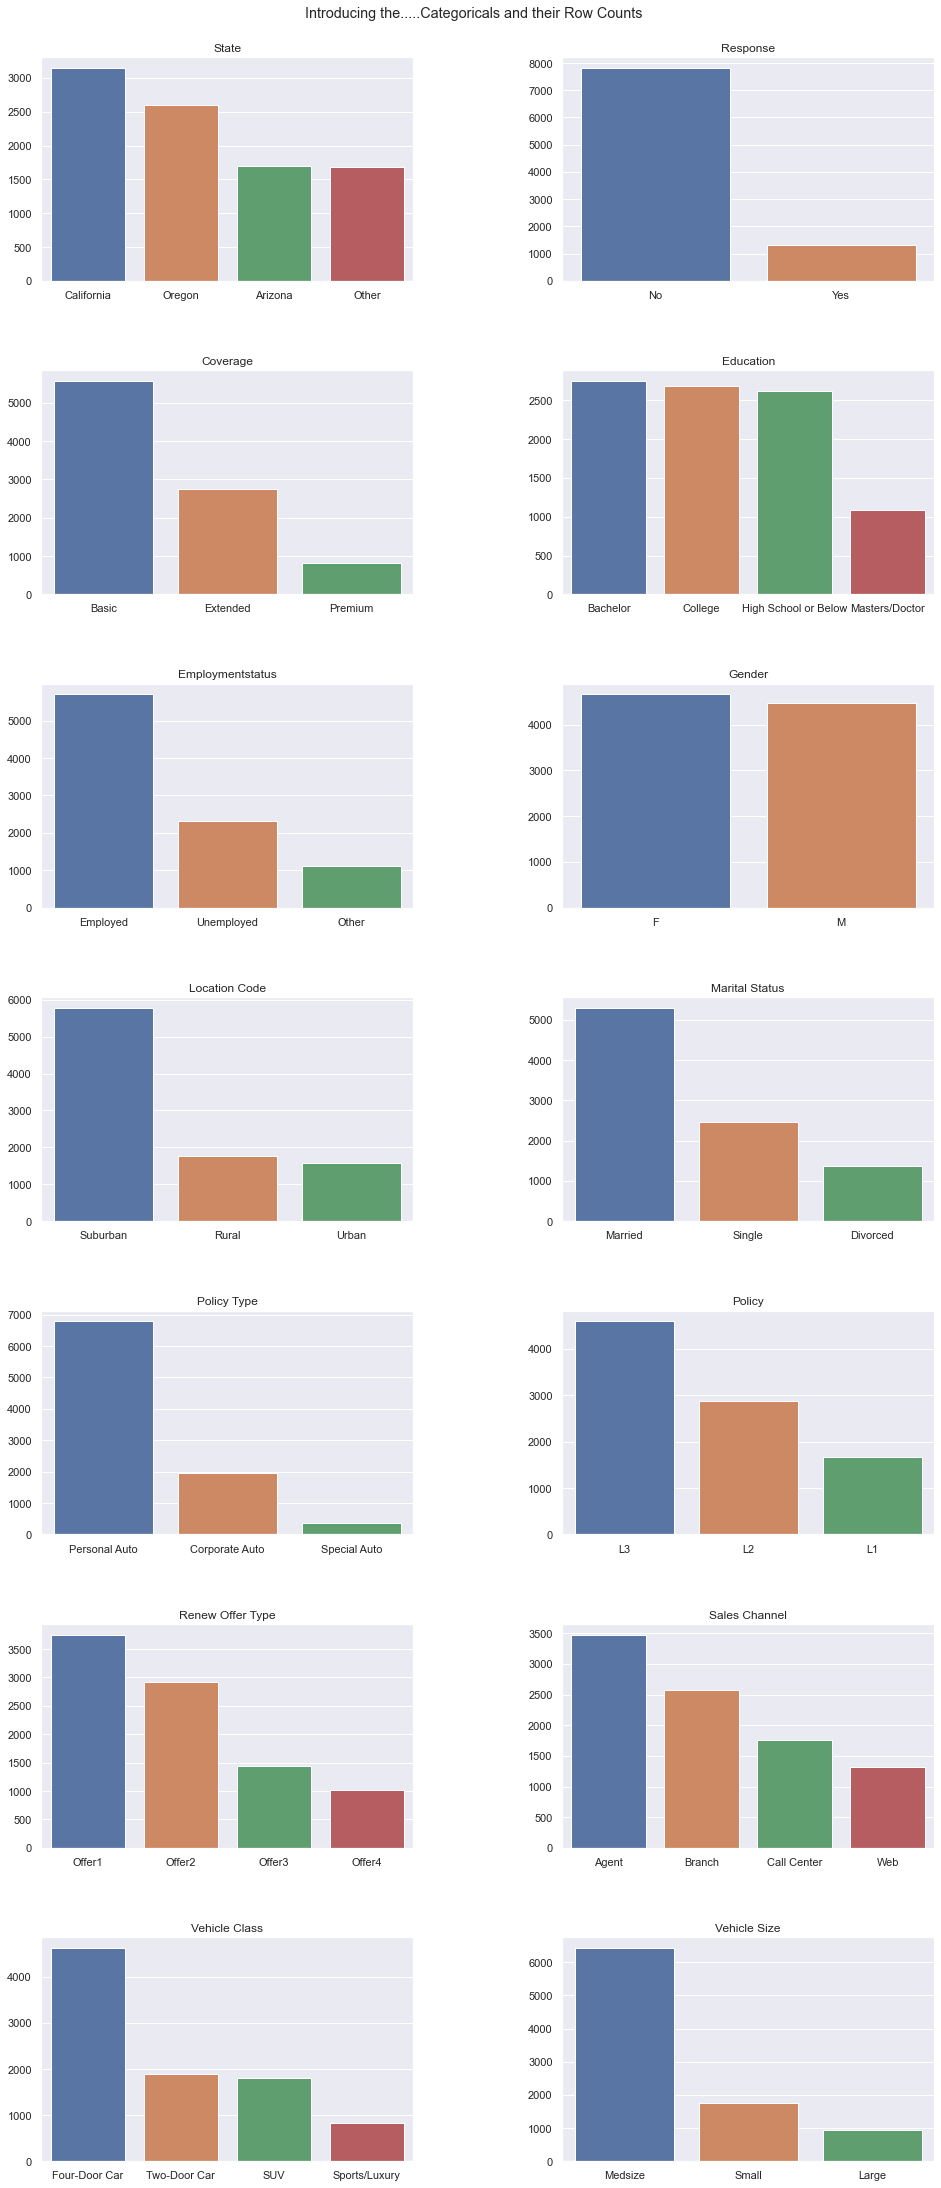

In [19]:
plot_my_df(cat_features)

## 9. Get categorical features.

In [20]:
dog_features = cat_features.drop(['customer'],axis=1)
dog_features

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


## 10. What should we do with the customer_id column?

*What should we do with the custom_id?\
What should we do with the custom_id?\
What should we do with the custom_id?\
Early in the morning!\
Way hey we'll drop this column\
Way hey we'll drop this column\
Way hey we'll drop this column\
Early in the morning!*

It depends - if we are going to aggregate the data we'll be dropping it entirely. If we are going to model the data to set a flag back to each customer, ...well, we still drop it for training our model but will reuse it later.

# Lab | Feature Extraction

1. Plot all the categorical variables with the proper plot. What can you see?
2. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
3. Plot time variable. Can you extract something from it?

In [21]:
cat_features

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


In [22]:
cat_features = cat_features.drop(['customer'],axis=1)

To plot our categorical values to assess them, our previous plot when cleaning data was looking into row counts. Maybe do something similar but plotting against our target variable. 'total_claim_amount'

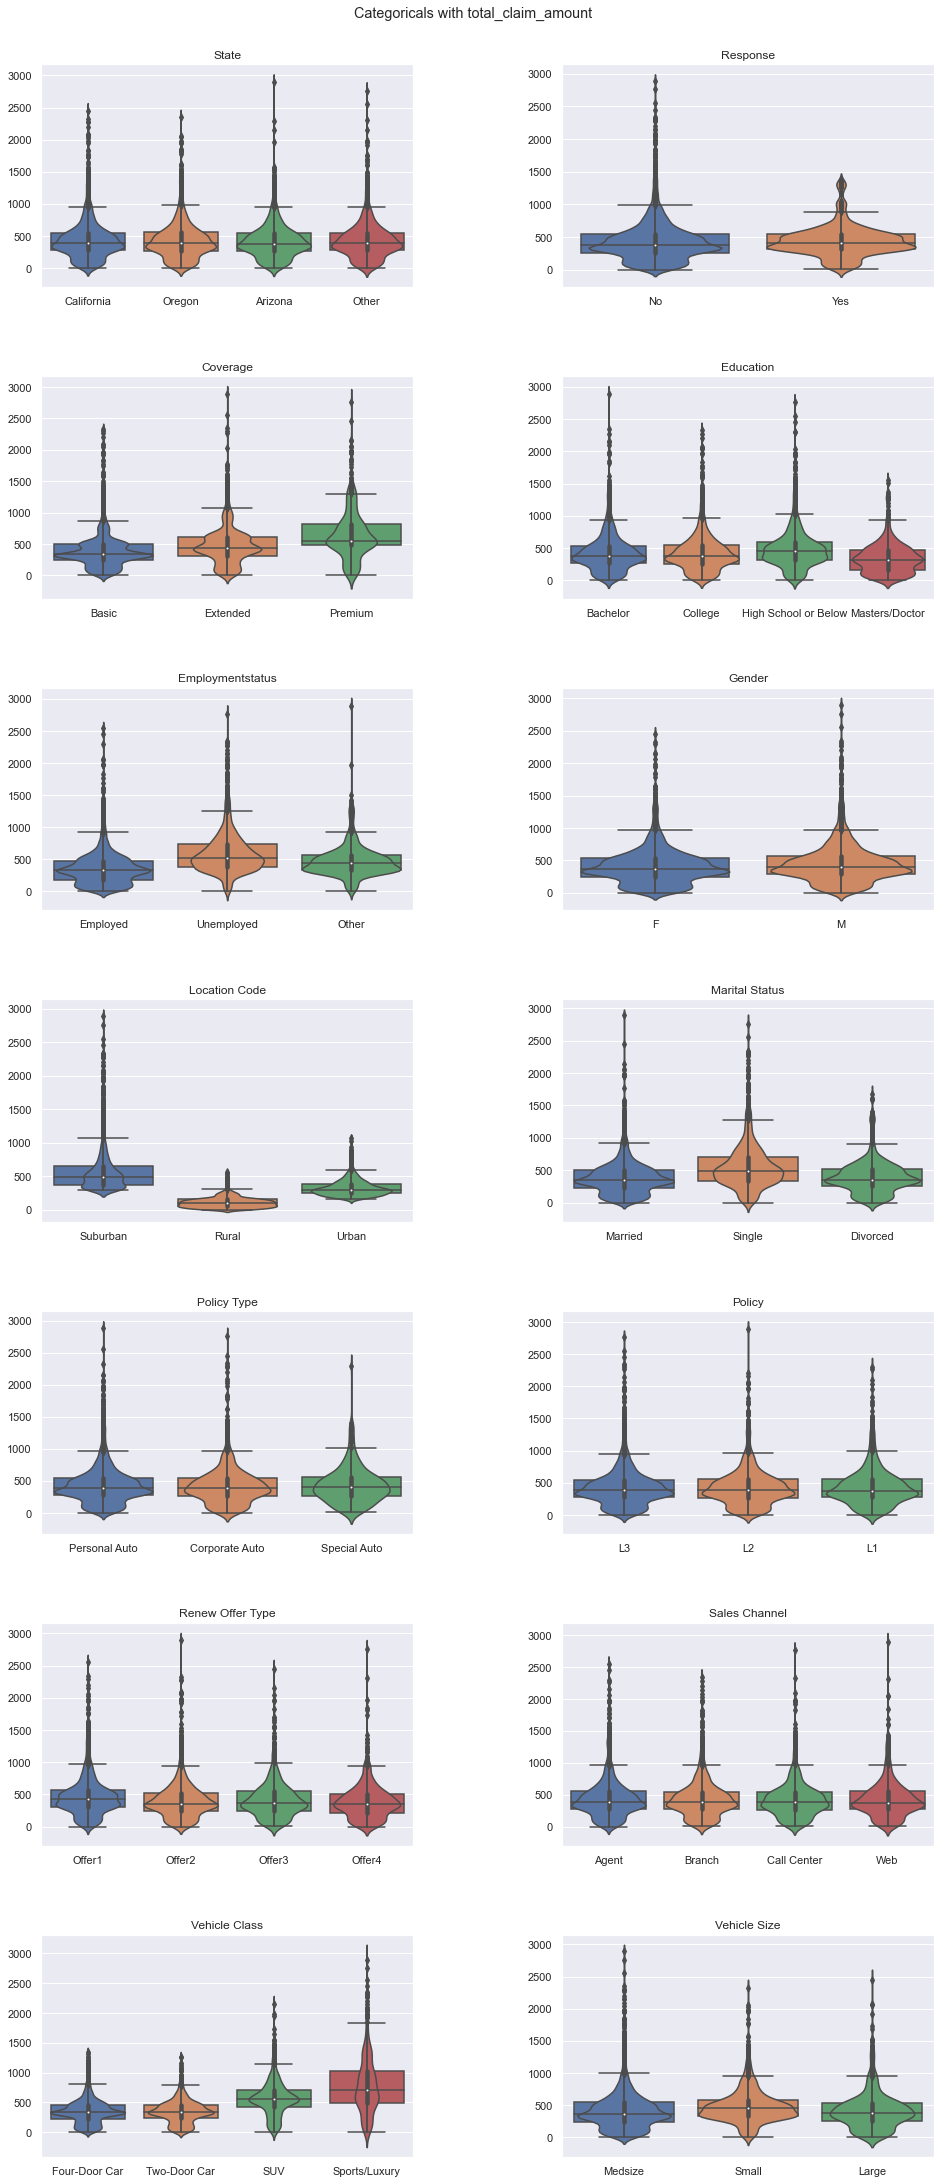

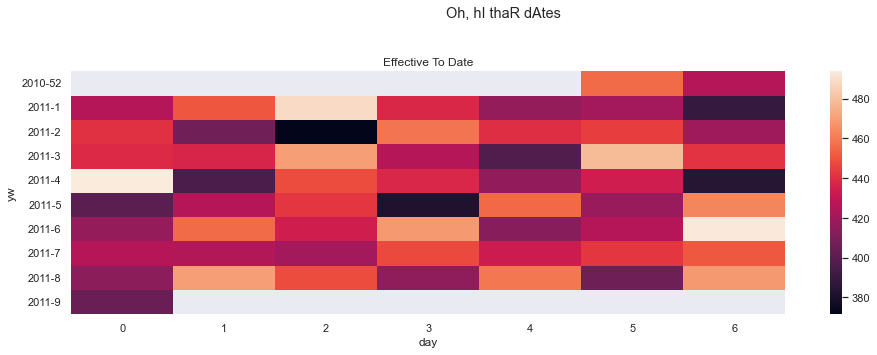

In [76]:
def plot_my_df_with_target(df,target):
    
    cat_features, num_continuous_features, num_descrete_features, df_dates = define_variable(df)
    
    #target = df[target]
            
    
    if len(cat_features.columns) > 0:
        cat_features = pd.concat([cat_features,df[target]], axis=1)
        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(cat_features.columns[1:].nunique()/2)*5))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.tight_layout()
        fig.subplots_adjust(top=0.96)

        i = 1
        for c in cat_features.columns[1:-1]: #skip customer/id  # replacing -1 with 2 for testing
            ax = fig.add_subplot(math.ceil(cat_features.columns[1:].nunique()/2), 2, i)
            i = i + 1
            #ax = sns.swarmplot(x=c, y=target, data=df, ax=ax, order=df[c].value_counts().index) #cool but takes a long time to plot with many points
            ax = sns.violinplot(x=c, y=target, data=df, ax=ax, order=df[c].value_counts().index) 
            ax = sns.boxplot(x=c, y=target, data=df, ax=ax, order=df[c].value_counts().index) 
            ax.set(xlabel=None, ylabel=None, title=unsnake(c))
        plt.suptitle('Categoricals with ' + target) 
        plt.show()
    
#     if len(num_descrete_features.columns) > 0:
#         print()
#         print()
#         print()
#         sns.set(rc = {'figure.figsize':(16,(math.ceil(num_descrete_features.columns.nunique()/2)*5))})
#         fig = plt.figure()
#         fig.subplots_adjust(hspace=.4, wspace=0.4)
#         fig.subplots_adjust(top=0.8) # 
#         i = 1
#         for c in num_descrete_features.columns: #skip customer
#             ax = fig.add_subplot(math.ceil(num_descrete_features.columns.nunique()/2), 2, i)
#             i = i + 1
#             ax = sns.countplot(y=c, data=df, ax=ax)        
#             ax.set(xlabel=None, ylabel=None, title=unsnake(c))
#         plt.suptitle('Introducing the.....Numerical Discrete and their Row Counts')
#         plt.show()
    
#     if len(num_continuous_features.columns) > 0:
#         print()
#         print()
#         print()
#         sns.set(rc = {'figure.figsize':(16,(math.ceil(num_continuous_features.columns.nunique()/2)*4))})
#         fig = plt.figure()
#         fig.subplots_adjust(hspace=.4, wspace=0.4)
#         fig.subplots_adjust(top=0.90)
#         i = 1
#         for c in num_continuous_features.columns: #skip customer
#             ax = fig.add_subplot(math.ceil(num_continuous_features.columns.nunique()/2), 2, i)
#             #ax = sns.swarmplot(x=c, data=df, color=".25")
#             i = i + 1
#             ax = sns.violinplot(x=c, data=df, ax=ax) 
#             ax.set(xlabel=None, ylabel=None, title=unsnake(c))
#         plt.suptitle('Introducing the.....Continuous Discrete and their Row Counts with a splash of Distribution')
#         plt.show()

#         print()
#         print()
#         print()
#         sns.set(rc = {'figure.figsize':(16,(math.ceil(num_continuous_features.columns.nunique()/2)*4))})
#         fig = plt.figure()
#         fig.subplots_adjust(hspace=.4, wspace=0.4)
#         fig.subplots_adjust(top=0.90)
#         i = 1
#         for c in num_continuous_features.columns: #skip customer
#             ax = fig.add_subplot(math.ceil(num_continuous_features.columns.nunique()/2), 2, i)
#             #ax = sns.swarmplot(x=c, data=df, color=".25")
#             i = i + 1
#             ax = sns.boxplot(x=c, data=df, ax=ax) 
#             ax.set(xlabel=None, ylabel=None, title=unsnake(c))
#         plt.suptitle('Introducing the.....Continuous Discrete again and their Row Counts with a splash of Distribution with a focus on outliers and extra long titles')
#         plt.show()
    
    if len(df_dates.columns) > 0:
        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(df_dates.columns.nunique()/2)*5))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.subplots_adjust(top=0.80)
        i = 1
        for c in df_dates.columns: #skip customer
            ax =  fig.add_subplot(math.ceil(df_dates.columns.nunique()/2), 1, i)
            i = i + 1
            #daynames = list(map(lambda x:x.day_name(),df_dates[c])) # replacing for now as sorting it is stressin' me out man
            daynames = list(map(lambda x:x.weekday(),df_dates[c]))
            #daynames = list(map(lambda x:x.day,df_dates[c]))
            daynames = pd.DataFrame(daynames, columns=['day'])
            year_week = list(map(lambda x:str(x.isocalendar()[0]) + "-" + str(x.isocalendar()[1]),df_dates[c]))
            #year_week = list(map(lambda x:x.month,df_dates[c]))
            year_week = pd.DataFrame(year_week, columns=['yw'])
            weeksanddays = pd.concat([daynames, year_week, df[target]],axis=1)
            weeksanddays = weeksanddays.groupby(['day','yw']).agg({target:np.mean})
            weeksanddays = weeksanddays.reset_index()
            #mysort = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
            #weeksanddays.sort_values(by=['day'], key=lambda x: x.map(mysort))
            #display(weeksanddays)
            weeksanddays = weeksanddays.pivot(index='yw',columns='day',values=target)
        #     #ax = sns.lineplot(x=day,y=target, data=daynames, ax=ax)
            ax = sns.heatmap(weeksanddays)
            ax.set(title=unsnake(c))
        plt.suptitle('Oh, hI thaR dAtes')
        plt.show()


# print(len(cat_features))
# print(len(customer_df))
# display(cat_features.index.max())
# display(customer_df.index.max())

for c in cat_features.columns:
    customer_df[c] = cat_features[c]
   
plot_my_df_with_target(customer_df, 'total_claim_amount')


So, what do we see...

...some of the columns, such as Rewew Offer Type, Gender, Sales Channel have fairly similar distributions of the target within them, so it is unlikely it will have large impact on our model. Perhaps a closer look would be needed though.

...as to what to do after reviewing the plots, if there is no variance in the target between our categories then the column likely isn't useful and we can exclude it from the model

Plot time variable. Can you extract something from it?

Well, not much, mostly quite jumbled, 0=Monday, so could say low claims on sunday for first few weeks then we this this trend switch to mondays for following weeks.

# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

**Instructions**
So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

**Hint for Categorical Variables**

*You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):*

- One hot to state
- Ordinal to coverage
- Ordinal to employmentstatus
- Ordinal to location code
- One hot to marital status
- One hot to policy type
- One hot to policy
- One hot to renew offercustomer_df
- One hot to sales channel
- One hot vehicle class
- Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
given that column "coverage" in the dataframe "data" has three categories:
"basic", "extended", and "premium" and values are to be represented in the same order.


## 1. Removing Outliers

We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>],
       [<AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

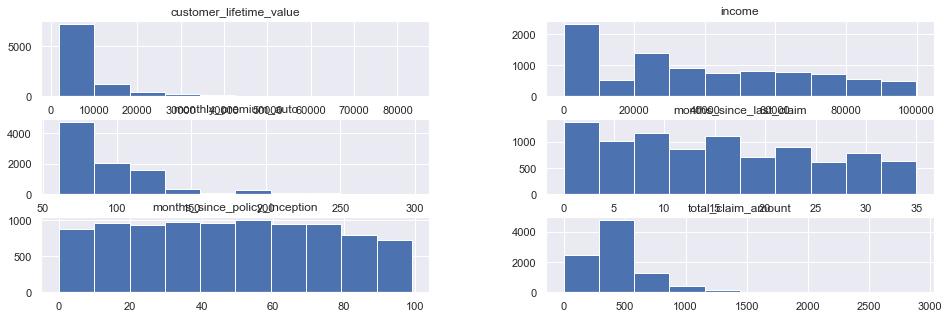

In [24]:
# customer_df
# cat_features
# num_continuous_features
# num_descrete_features
# df_dates

num_continuous_features.hist()
# candidates for removing outliers: customer_lifetime_value & monthly_premium_auto

In [25]:
def check_outliers(df, columns_to_cull):
    for c in df[columns_to_cull].columns:
        print(c)
        print('.75 quantile:   ' + str(np.quantile(df[c],0.75)))
        iqr = np.quantile(df[c],.75) - np.quantile(df[c],.25)
        print('iqr:            ' + str(iqr))
        upper_limit = np.quantile(df[c],.75) + (1.5*iqr)
        print('upper limit:    '+str(upper_limit))
        extraordinary_points = df[df[c] > upper_limit]
        print('Outliers:       ' + str(len(extraordinary_points)))
        print('Current length: ' + str(len(df)))
        print()
        
def remove_outliers(df, columns_to_cull):
    for c in df[columns_to_cull].columns:
        iqr = np.quantile(df[c],.75) - np.quantile(df[c],.25)
        upper_limit = np.quantile(df[c],.75) + (1.5*iqr)
        extraordinary_points = df[df[c] > upper_limit]
        df = df[df[c] <= upper_limit]
        df.reset_index()
    return df

# Checking how many values will be removed if the outliers are removed

check_outliers(customer_df, ['customer_lifetime_value','monthly_premium_auto'])
#...we'd be dropping almost 10% of our data removing outliers in customer_lifetime_value and upto another ~5% for monthly_premium_auto
#feels a little excessive...

# maybe we can just log em instead
def log_it(df, columns_to_log):
    df = df.copy()
    for c in df[columns_to_log]:
        df[c] = list(map(lambda x:np.log(x),df[c]))
    return df
        
logged = log_it(customer_df, ['customer_lifetime_value','monthly_premium_auto'])

customer_lifetime_value
.75 quantile:   8962.16704125
iqr:            4967.915247000001
upper limit:    16414.039911750002
Outliers:       817
Current length: 9134

monthly_premium_auto
.75 quantile:   109.0
iqr:            41.0
upper limit:    170.5
Outliers:       430
Current length: 9134



<AxesSubplot:>

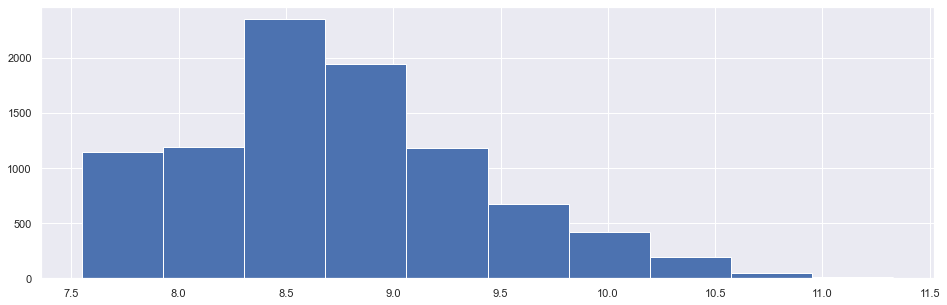

In [26]:
logged['customer_lifetime_value'].hist()

<AxesSubplot:>

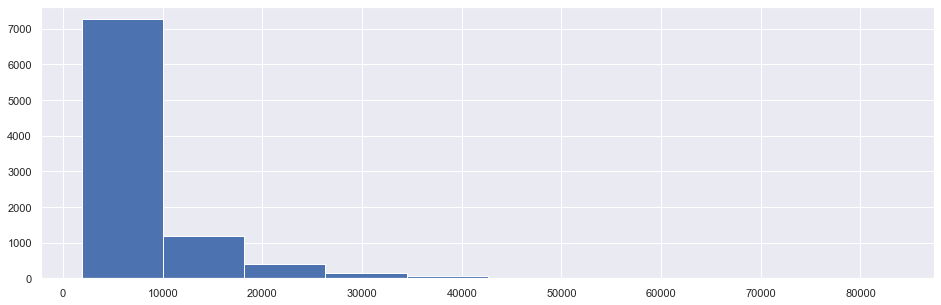

In [27]:
customer_df['customer_lifetime_value'].hist()

<AxesSubplot:>

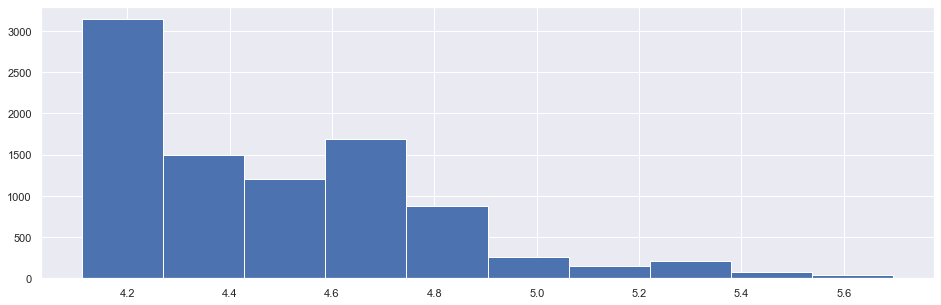

In [28]:
logged['monthly_premium_auto'].hist()

<AxesSubplot:>

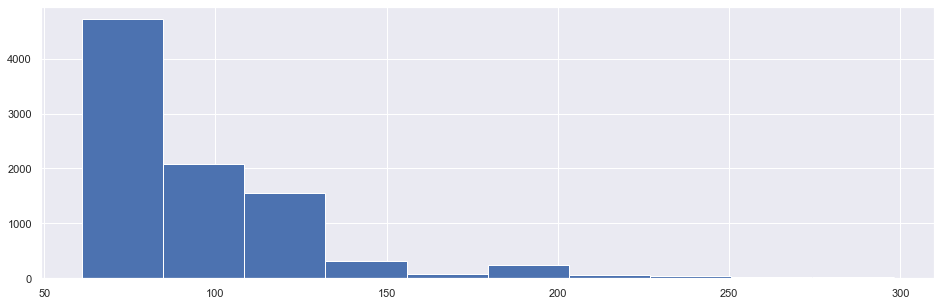

In [29]:
customer_df['monthly_premium_auto'].hist()

In [30]:
check_outliers(logged,['customer_lifetime_value','monthly_premium_auto'])
# interesting, so we get less outliers after applying log, think i was thinkig it wouldn't change it but prolly thinking of scaling rather than log.
# so its a much lower percentage. willing to try it

customer_lifetime_value
.75 quantile:   9.100767326620565
iqr:            0.8081557842911788
upper limit:    10.313001003057334
Outliers:       185
Current length: 9134

monthly_premium_auto
.75 quantile:   4.6913478822291435
iqr:            0.4718401770530365
upper limit:    5.399108147808699
Outliers:       106
Current length: 9134



In [31]:
logged_culled = remove_outliers(logged,['customer_lifetime_value','monthly_premium_auto'])

<AxesSubplot:>

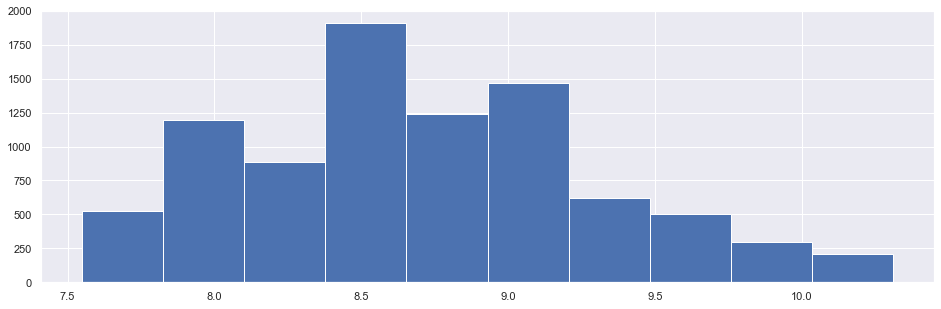

In [32]:
logged_culled['customer_lifetime_value'].hist()

In [33]:
len(logged_culled)

8850

### 2. Create a copy of the dataframe for the data wrangling.
### 3. Normalize the continuous variables. You can use any one method you want.

In [150]:
to_be_wrangled = logged_culled.copy() # 2 = done.
global minmaxtransformer

(7080, 23)

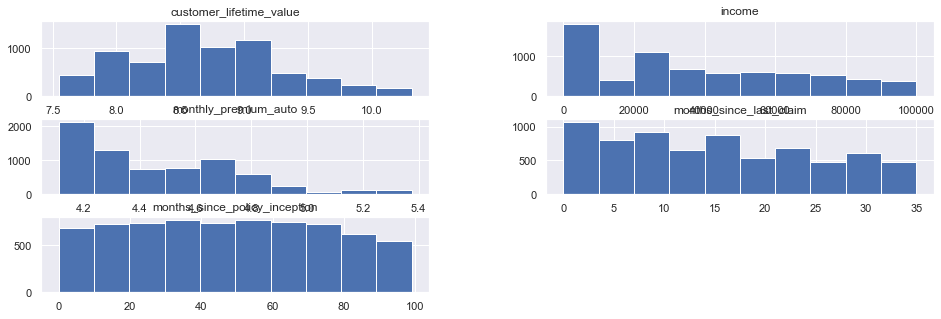

In [151]:
# normalize our continuous...
y = to_be_wrangled[['total_claim_amount']]
X = to_be_wrangled.drop(['total_claim_amount'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=79)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

X_train_cat, X_train_num_cont, X_train_num_desc, X_train_dates = define_variable(X_train)
X_test_cat, X_test_num_cont, X_test_num_desc, X_test_dates = define_variable(X_test)

X_train_num_cont.hist()
X_train.shape

In [152]:
def scale_me_please(df, numericals_for_minmaxscaler=[], numericals_for_starndardscaler=[], refit=True):
    global minmaxtransformer 
    # min_max_scaler
    if len(numericals_for_minmaxscaler) > 0:
        minmaxscaler_numericals = df[numericals_for_minmaxscaler]    

        X = minmaxscaler_numericals
        if refit:
            minmaxtransformer = MinMaxScaler().fit(X)
        x_normalized = minmaxtransformer.transform(X)
        minmaxscaled = pd.DataFrame(x_normalized, columns=X.columns)
        # replace df columns with mm scaled columns
        df = df.drop(numericals_for_minmaxscaler, axis=1)
        minmaxscaled.reset_index()
        df = pd.concat([df,minmaxscaled],axis=1)
    # standard_scaler
    if len(numericals_for_starndardscaler) > 0:
        standardscaler_numericals = df[numericals_for_starndardscaler]

        X = standardscaler_numericals
        if refit:
            standardtransformer = StandardScaler().fit(X)
        x_standardized = standardtransformer.transform(X)
        x_standardized = pd.DataFrame(x_standardized,columns=X.columns)

        # replace df columns with mm scaled columns
        df = df.drop(standardscaler_numericals, axis=1)
        df = pd.concat([df,x_standardized],axis=1)

    return df

In [153]:
X_train = scale_me_please(X_train, numericals_for_minmaxscaler=X_train_num_cont.columns)
X_test = scale_me_please(X_test, numericals_for_minmaxscaler=X_test_num_cont.columns, refit=False)

In [38]:
# Legacy - had nulls appearing needed a reset index after test_train split....
# display(X_train)
# display(X_train2.shape)
# display(X_train2.columns)
# for some fun reason the values we removed for outliers have returned as nulls, dirty fix for now
#X_train = X_train2.dropna()
#display(X_train.shape)

4. Encode the categorical variables


- Ordinal
    - to coverage
    - employmentstatus
    - location code
    - vehicle size
- One hot
    - to state
    - marital status
    - policy type
    - to policy
    - renew offercustomer_df
    - sales channel
    - vehicle class

In [154]:
for c in ['coverage','employmentstatus','location_code','vehicle_size']:
    display(X_train_cat[c].value_counts())

Basic       4390
Extended    2090
Premium      600
Name: coverage, dtype: int64

Employed      4391
Unemployed    1808
Other          881
Name: employmentstatus, dtype: int64

Suburban    4462
Rural       1400
Urban       1218
Name: location_code, dtype: int64

Medsize    4969
Small      1356
Large       755
Name: vehicle_size, dtype: int64

In [155]:
#ordinal

def apply_ordinals(df):
    df['coverage'] = df['coverage'].map({'Basic' : 1, 'Extended' : 2, 'Premium' : 3})
    df['location_code'] = df['location_code'].map({'Rural' : 1, 'Urban' : 2, 'Suburban' : 3})
    df['vehicle_size'] = df['vehicle_size'].map({'Small' : 1, 'Medsize' : 2, 'Large' : 3})
    return df

# education isn't covered in the suggested list, seems like a good candidate for ordinal though.
# not so sure about employementstatus as ordinal considering original categories: unemployed, employed, medical leave, retired, disabled
# maybe we can assume that we adjust categories to effectively employed and not-employed
# will leave it as is for now

X_train_cat = apply_ordinals(X_train_cat)
X_test_cat = apply_ordinals(X_test_cat)


In [156]:
# Encoding
X_train_cat = X_train_cat.drop(['customer'],axis=1)
X_train_cat_ec = pd.get_dummies(X_train_cat, columns=X_train_cat.drop(['coverage','location_code','vehicle_size'],axis=1).columns, drop_first=True)

X_train = X_train.drop(X_train_cat.columns, axis=1)
X_train = pd.concat([X_train, X_train_cat_ec], axis=1)
display(X_train.shape)

X_test_cat = X_test_cat.drop(['customer'],axis=1)
X_test_cat_ec = pd.get_dummies(X_test_cat, columns=X_test_cat.drop(['coverage','location_code','vehicle_size'],axis=1).columns, drop_first=True)

X_test = X_test.drop(X_test_cat.columns, axis=1)
X_test = pd.concat([X_test, X_test_cat_ec], axis=1)

(7080, 37)

5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [157]:
def date_jiggle(df, date_columns):
    for c in date_columns:       
        weekday = list(map(lambda x:x.weekday(),df[c]))
        weekday = pd.DataFrame(weekday, columns=['weekday'])
        #year_week = list(map(lambda x:str(x.isocalendar()[0]) + "-" + str(x.isocalendar()[1]),df_dates[c]))
        #year_week = pd.DataFrame(year_week, columns=['yw'])
        month = list(map(lambda x:x.month,df[c]))
        month = pd.DataFrame(month, columns=['month'])
        df = df.drop(c,axis=1)
        df = pd.concat([df, month, weekday], axis=1)
    return df

X_train = date_jiggle(X_train, X_train_dates.columns)
X_test = date_jiggle(X_test, X_test_dates.columns)
display(X_train.shape)
# deffo something funky going on with functions and dataframes
#X_train = X_train.dropna()
#display(X_train.shape)

(7080, 38)

In [111]:
#X_train
#X_test

,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,state_California,state_Oregon,state_Other,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports/Luxury,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,month,weekday
0,1,2,0.720715,0.524330,0.528509,0.057143,0.808081,0,0,1,...,0,0,1,0,0,0,1,0,1,6
1,3,8,0.631785,0.911403,0.645663,0.914286,0.707071,0,0,1,...,0,0,0,1,0,0,1,0,1,1
2,1,6,0.454894,0.926706,0.243567,0.428571,0.808081,1,0,0,...,0,0,0,0,0,0,1,0,1,5
3,0,9,0.523070,0.255999,0.398802,0.142857,0.868687,1,0,0,...,0,1,0,1,0,0,1,0,2,2
4,0,2,0.609878,0.000000,0.341996,0.657143,0.343434,0,1,0,...,0,0,0,0,0,0,1,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,0,6,0.400224,0.880717,0.120061,0.314286,0.373737,0,0,1,...,0,1,0,0,0,0,1,0,1,5
7076,1,4,0.432012,0.000000,0.253038,0.514286,0.252525,0,0,1,...,0,0,0,0,0,0,1,0,1,3
7077,0,1,0.142788,0.412358,0.120061,0.542857,0.131313,0,0,1,...,1,0,0,0,0,0,0,1,2,2
7078,0,3,0.524602,0.508347,0.406594,0.085714,0.464646,0,1,0,...,0,0,0,1,0,0,1,0,2,5


6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [158]:
X_train = X_train.drop(['customer'],axis=1)
display(len(X_train.columns) == len(X_train.select_dtypes(np.number).columns))
X_test = X_test.drop(['customer'],axis=1)
display(len(X_test.columns) == len(X_test.select_dtypes(np.number).columns))


True

True

## Additional:

Find out if there is a relationship between the following categorical columns using Chi-Squared: 
- education - vehicle_size
- location_code - coverage

In [159]:
# alpha = 0.05 which I totally noted prior to running the below...

data_crosstab = pd.crosstab(X_train_cat['education'], X_train_cat['vehicle_size'], margins = False)
print("Relationship check between 'education' and 'vehicle_size':")
display(stats.chi2_contingency(data_crosstab)[1])
if stats.chi2_contingency(data_crosstab)[1] < 0.05:
    print('If it is low let it H0 go. Reject null hypothesis')
else:
    print('Do not reject null hypothesis')

print()

data_crosstab = pd.crosstab(X_train_cat['location_code'], X_train_cat['coverage'], margins = False)
print("Relationship check between 'location_code' and 'coverage':")
display(stats.chi2_contingency(data_crosstab)[1])
if stats.chi2_contingency(data_crosstab)[1] < 0.05:
    print('If it is low let it H0 go. Reject null hypothesis')
else:
    print('Do not reject null hypothesis')

Relationship check between 'education' and 'vehicle_size':


0.15065280968769343

Do not reject null hypothesis

Relationship check between 'location_code' and 'coverage':


0.0010627310540982453

If it is low let it H0 go. Reject null hypothesis


H1: The 2 categoricals are related\
H0: The 2 categoricals are not related\
p > 0.05 ===> we can not reject the H0 ===> we can work under the assumption they are not related.


education and vehicle size: We do not reject the null hypothesis, we have evidence that they are not related.

location_code and coverage: We reject the null hypothesis, we have strong evidence that they are related and as such could exclude one from our features as being redundant.

In [161]:
round_to_n = lambda x, n: x if x == 0 else round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1))

i=1
notes = []
kitties = []
for c1 in X_train_cat.columns:
    for c2 in X_train_cat.columns[i:]:
        data_crosstab = pd.crosstab(X_train_cat[c1], X_train_cat[c2], margins = False)
        if stats.chi2_contingency(data_crosstab)[1] < 0.05:
            notes.append(c1 + " - " + c2 + ": are connected (" + str(round_to_n(stats.chi2_contingency(data_crosstab)[1],2)) + ")")
            kitties.append(c1)
            kitties.append(c2)
    i=i+1

print(str(len(notes)) + " connections we have evidence for")
display(notes)
pd.DataFrame(kitties).value_counts()

33 connections we have evidence for


['state - policy: are connected (0.019)',
 'response - education: are connected (0.0086)',
 'response - employmentstatus: are connected (1.2e-56)',
 'response - location_code: are connected (9.1e-19)',
 'response - marital_status: are connected (2.4e-16)',
 'response - renew_offer_type: are connected (5.099999999999998e-92)',
 'response - sales_channel: are connected (2.1e-15)',
 'response - vehicle_size: are connected (0.00059)',
 'coverage - gender: are connected (0.034)',
 'coverage - location_code: are connected (0.0011)',
 'coverage - renew_offer_type: are connected (2.6e-06)',
 'coverage - sales_channel: are connected (0.019)',
 'education - employmentstatus: are connected (2.4e-17)',
 'education - location_code: are connected (2.3999999999999997e-46)',
 'education - marital_status: are connected (3.9e-18)',
 'education - renew_offer_type: are connected (8.3e-09)',
 'education - sales_channel: are connected (0.0013)',
 'employmentstatus - location_code: are connected (2.599999999

location_code       9
renew_offer_type    9
marital_status      7
response            7
education           6
employmentstatus    5
gender              5
coverage            4
sales_channel       4
vehicle_class       3
vehicle_size        3
policy              2
policy_type         1
state               1
dtype: int64

Then begins the fun job of figuring out when ones are best to drop.. :|

I wonder if it makes sense to remove the ones that appear most or least often.

In [162]:
X_train_cat = X_train_cat.drop(['renew_offer_type','policy_type','response','sales_channel','gender','location_code'],axis=1)
X_train_cat = X_train_cat.drop(['education','marital_status','state'],axis=1)

i=1
notes = []
kitties = []
for c1 in X_train_cat.columns:
    for c2 in X_train_cat.columns[i:]:
        data_crosstab = pd.crosstab(X_train_cat[c1], X_train_cat[c2], margins = False)
        if stats.chi2_contingency(data_crosstab)[1] < 0.05:
            notes.append(c1 + " - " + c2 + ": are connected (" + str(round_to_n(stats.chi2_contingency(data_crosstab)[1],2)) + ")")
            kitties.append(c1)
            kitties.append(c2)
    i=i+1

print(str(len(notes)) + " connections we have evidence for")
display(notes)
pd.DataFrame(kitties).value_counts()

0 connections we have evidence for


[]

Series([], dtype: int64)

In [163]:
X_train_cat # I guess we can do this earlier in the process / perhaps 

,coverage,employmentstatus,policy,vehicle_class,vehicle_size
0,3,Employed,L1,Four-Door Car,2
1,2,Employed,L1,SUV,2
2,2,Employed,L2,Four-Door Car,2
3,1,Employed,L2,SUV,2
4,2,Unemployed,L1,Four-Door Car,2
...,...,...,...,...,...
7075,1,Employed,L1,Four-Door Car,2
7076,2,Unemployed,L2,Four-Door Car,2
7077,1,Employed,L3,Four-Door Car,1
7078,1,Employed,L3,SUV,2


In [164]:
# lets take a look at model prior to dropping those extra columns...

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

predictions_train = lm.predict(X_train)
predictions_test = lm.predict(X_test)

# show performance
#if putout:
print('--- training data ---')
print('R2:   ' + str(r2_score(y_train, predictions_train)))
print()
print('--- test data ---')
print('R2:       ' + str(r2_score(y_test, predictions_test)))
print('MSE:      ' + str(unkind_squared_error(y_test,predictions_test)))
print('RMSE/MAE: ' + str(np.sqrt(unkind_squared_error(y_test,predictions_test))))

--- training data ---
R2:   0.7432852292962266

--- test data ---
R2:       0.7427329269707335
MSE:      18630.93472808426
RMSE/MAE: 136.49518206912748


So the redundant cat features that we identify above aren't built into the model just yet, R2 score is below what I had in initial pass in week 1/2 of this data set. Will have to tie the categorical column drops into the model to see if we can get an improvement and check how we're ordering things.

Of course in the first week we did the x/y split later in the process which could have helped cheat the the R2 score a bit higher...

In [165]:
import pickle

In [168]:
X_train.to_pickle('xtrain.p')
y_train.to_pickle('ytrain.p')
X_test.to_pickle('xtest.p')
y_test.to_pickle('ytest.p')